<a href="https://colab.research.google.com/github/KhanFaisa/Machine-Learning-Project/blob/main/Unsupervised_Machin_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unsupervised Machine Learning
1. K- Means
2. Hierarchical
Target Feature Will Not Be There For Clustering. Main Goal Is to Categorize Similar
Datapoints Together

In [1]:

%pip install yellowbrick plotly nbformat

### Step 1 : Read The Dataset

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Problem statement : Catgorize similar customers based on Age, Income and spending (Customer Segmentation)

### Step 2 : Perform Basic  Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Step 3 : Seperate X values (Age, Income, Spending)


In [7]:
X1 = df[['Age', 'Income', 'Spending']]
X1.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Step 4 : Preprocess The Data With Pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [10]:
x_pre = num_pipe.fit_transform(X1)
x_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Step 5 : Find The Optimal Number Of Clusters Using Yellowbrick Packageb

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

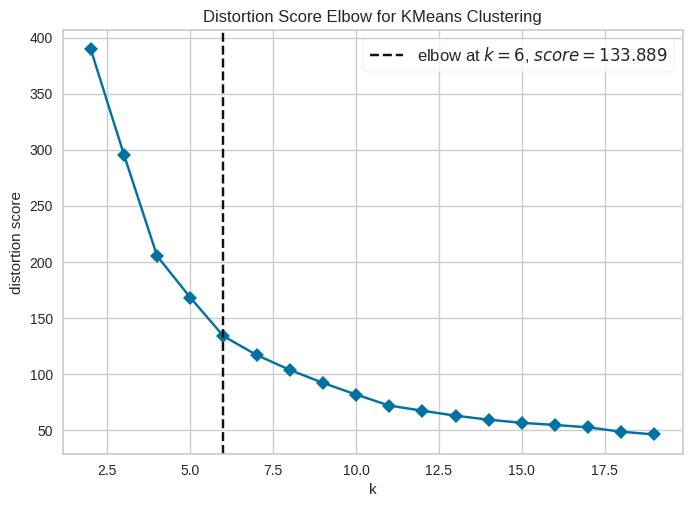

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer = KElbowVisualizer(KMeans(),
                              k=(2, 20),
                              timings =False)
visualizer.fit(x_pre)
visualizer.show()

### Based On Above Graph Elbow Found At K=6, CreateK - Means With 6 cluster

In [13]:
km_model = KMeans(n_clusters=6)
lb1 = km_model.fit_predict(x_pre)

In [14]:
lb1

array([1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2,
       5, 2, 4, 2, 4, 2, 5, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

### Save Above Value In X1

In [15]:
X_lab1 = X1.copy()
X_lab1['Label'] = lb1

In [16]:
X_lab1


,Age,Income,Spending,Label
0,19,15,39,1
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,4
197,32,126,74,2
198,32,137,18,4


In [17]:
X_lab1.query("Label==0")


,Age,Income,Spending,Label
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0


In [18]:
X_lab1.query("Label==1")


,Age,Income,Spending,Label
0,19,15,39,1
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
11,35,19,99,1
13,24,20,77,1
15,22,20,79,1
17,20,21,66,1


In [19]:
for i in range(6):
  print(f'Label : {i}\n')
  display(X_lab1.query(f"Label=={i}"))
  print('\n=======================================\n')


Label : 0



,Age,Income,Spending,Label
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0




Label : 1



,Age,Income,Spending,Label
0,19,15,39,1
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
11,35,19,99,1
13,24,20,77,1
15,22,20,79,1
17,20,21,66,1




Label : 2



,Age,Income,Spending,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Label : 3



,Age,Income,Spending,Label
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
8,64,19,3,3
10,67,19,14,3
12,58,20,15,3
14,37,20,13,3
16,35,21,35,3
18,52,23,29,3
20,35,24,35,3




Label : 4



,Age,Income,Spending,Label
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
134,20,73,5,4
136,44,73,7,4
140,57,75,5,4
144,25,77,12,4
146,48,77,36,4
148,34,78,22,4
150,43,78,17,4




Label : 5



,Age,Income,Spending,Label
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5
69,32,48,47,5


### Get The Centriods

In [20]:
cent1 = X_lab1.groupby(by='Label').mean(numeric_only=True)
cent1

,Age,Income,Spending
Label,,,
0,56.333333,54.266667,49.066667
1,25.250000,25.833333,76.916667
2,32.692308,86.538462,82.128205
3,45.523810,26.285714,19.380952
4,41.939394,88.939394,16.969697
5,26.684211,57.578947,47.789474


### Plot The Above Results

In [21]:

import plotly.express as px
fig = px.scatter_3d(data_frame=X_lab1,
                    x = 'Age',
                    y = 'Income',
                    z = 'Spending',
                    color='Label')
fig.show()

## Agglomerative Clustering

In [24]:
x_pre


,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [26]:
from sklearn.cluster import AgglomerativeClustering
ag_model = AgglomerativeClustering(n_clusters=6)
lab2 = ag_model.fit_predict(x_pre)
lab2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [27]:

X_lab2 = X1.copy()
X_lab2['Label'] = lab2

In [28]:
X_lab2


,Age,Income,Spending,Label
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [29]:
print('Agglomerative Clustering')
for i in range(6):
  print(f'Label : {i}\n')
  display(X_lab2.query(f"Label=={i}"))
  print('\n==================================================\n')


Agglomerative Clustering
Label : 0



,Age,Income,Spending,Label
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Label : 1



,Age,Income,Spending,Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Label : 2



,Age,Income,Spending,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Label : 3



,Age,Income,Spending,Label
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Label : 4



,Age,Income,Spending,Label
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Label : 5



,Age,Income,Spending,Label
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [30]:
cent2 = X_lab2.groupby(by='Label').mean(numeric_only=True)
cent2

,Age,Income,Spending
Label,,,
0,27.377778,57.511111,45.844444
1,56.400000,55.288889,48.355556
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571
4,44.318182,25.772727,20.272727
5,24.809524,25.619048,80.238095


In [31]:
fig2 = px.scatter_3d(data_frame=X_lab2,
                     x='Age',
                     y='Income',
                     z='Spending',
                     color='Label')
fig2.show()